C:\Users\Shuhaib\AppData\Local\Temp\ipykernel_7196\1355678706.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["price"].fillna(df_cleaned["price"].median(), inplace=True)


   origin  destination  train_type  price  train_class  fare
0       0            1           1  38.55            1     1
1       0            1           2  53.40            1     1
2       0            1           2  47.30            1     1
3       0            1           2  69.40            0     1
4       0            1           0  60.30            1     1


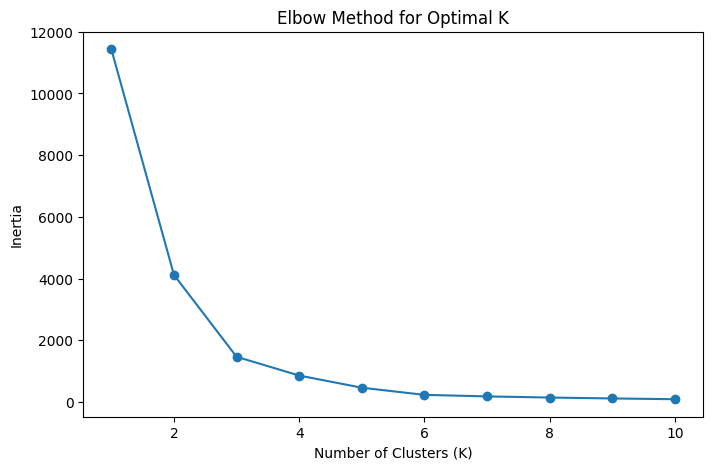

   origin  destination  train_type  price  train_class  fare  Cluster
0       0            1           1  38.55            1     1        1
1       0            1           2  53.40            1     1        0
2       0            1           2  47.30            1     1        1
3       0            1           2  69.40            0     1        2
4       0            1           0  60.30            1     1        0
Clustered data saved as 'clustered_public_transport.csv'


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Load dataset
file_path = "C:/Users/Shuhaib/Downloads/shuaib/DATA SET/public_transport.csv" # Change this path if needed
df = pd.read_csv(file_path)

# Drop unnecessary columns
df_cleaned = df.drop(columns=["Unnamed: 0", "insert_date", "start_date", "end_date"])

# Handle missing values in 'price' by filling with the median
df_cleaned["price"].fillna(df_cleaned["price"].median(), inplace=True)

# Encode categorical variables
label_encoders = {}
for col in ["origin", "destination", "train_type", "train_class", "fare"]:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le  # Save the encoder for future use

# Check preprocessed data
print(df_cleaned.head())

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 11)  # Checking clusters from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cleaned)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# Apply K-Means clustering with the chosen number of clusters (e.g., K=3)
optimal_k = 3  # Adjust based on the elbow point
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cleaned["Cluster"] = kmeans.fit_predict(df_cleaned)

# Display final clustered data
print(df_cleaned.head())

# Save the clustered dataset
df_cleaned.to_csv("clustered_public_transport.csv", index=False)
print("Clustered data saved as 'clustered_public_transport.csv'")
